<a href="https://colab.research.google.com/github/Elaravi1998/Manhattan-Minkowski-distance/blob/main/Manhattan_and_Minkowski_distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

In [35]:
# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target


In [36]:
# Convert dataset to DataFrame for analysis
df = pd.DataFrame(X, columns=iris.feature_names)
df['target'] = y


In [37]:
# Display dataset insights
print("\nDataset Overview:")
print(df.describe())


print("Head of the dataset:")
print(df.head())

print("\nTail of the dataset:")
print(df.tail())


Dataset Overview:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
Head of the dataset:
   sepal length (cm)  sepal widt

In [38]:
# Normalize the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [39]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:
# Function to compute distance
def compute_distance(x1, x2, metric='euclidean'):
    if metric == 'euclidean':
        return np.sqrt(np.sum((x1 - x2) ** 2))
    elif metric == 'manhattan':
        return np.sum(np.abs(x1 - x2))
    elif metric == 'minkowski':
        p = 3  # Tune this parameter as needed
        return np.sum(np.abs(x1 - x2) ** p) ** (1 / p)
    else:
        raise ValueError("Unsupported distance metric")

In [41]:
# Custom KNN Classifier
class KNN:
    def __init__(self, k=5, metric='euclidean'):
        self.k = k
        self.metric = metric

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        return np.array([self._predict(x) for x in X])

    def _predict(self, x):
        distances = [compute_distance(x, x_train, self.metric) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        return np.bincount(k_nearest_labels).argmax()

Optimal K for euclidean: 3
Optimal K for manhattan: 8
Optimal K for minkowski: 12


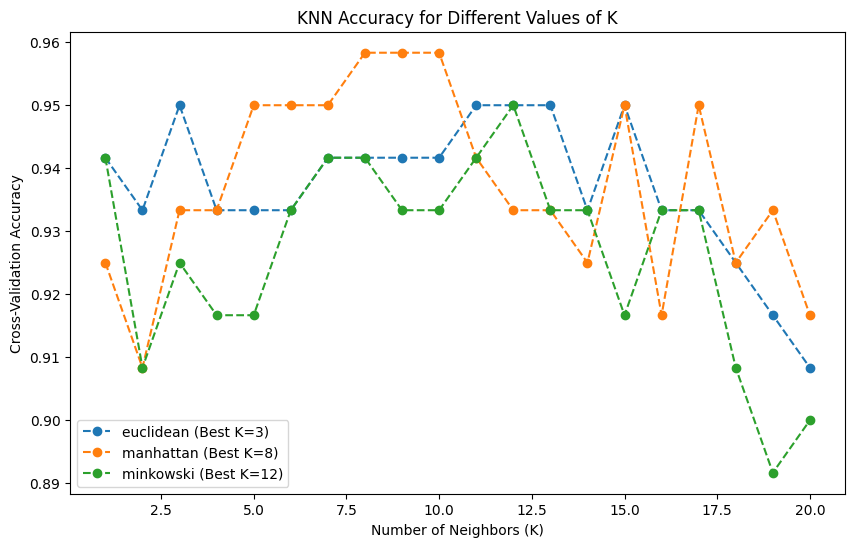

In [42]:
# Optimize K using cross-validation for different distance metrics
metrics = ['euclidean', 'manhattan', 'minkowski']
k_range = range(1, 21)

plt.figure(figsize=(10, 6))  # Prevents overlapping plots

for metric in metrics:
    k_scores = []  # Reset k_scores for each metric

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric if metric != 'minkowski' else 'minkowski', p=3)
        scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        k_scores.append(scores.mean())

    best_k = k_range[np.argmax(k_scores)]
    print(f'Optimal K for {metric}: {best_k}')

    plt.plot(k_range, k_scores, marker='o', linestyle='dashed', label=f'{metric} (Best K={best_k})')

plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('KNN Accuracy for Different Values of K')
plt.legend()
plt.show()


In [43]:
# Train and test custom KNN with optimized K (using Euclidean distance as default)
optimal_k = k_range[np.argmax(k_scores)]
custom_knn = KNN(k=optimal_k)
custom_knn.fit(X_train, y_train)
y_pred_custom = custom_knn.predict(X_test)
custom_accuracy = accuracy_score(y_test, y_pred_custom)
print(f'Custom KNN Accuracy: {custom_accuracy * 100:.2f}%')

Custom KNN Accuracy: 100.00%


In [44]:
# Scikit-Learn KNN with optimized K
sklearn_knn = KNeighborsClassifier(n_neighbors=optimal_k)
sklearn_knn.fit(X_train, y_train)
y_pred_sklearn = sklearn_knn.predict(X_test)
sklearn_accuracy = accuracy_score(y_test, y_pred_sklearn)
print(f'Scikit-Learn KNN Accuracy: {sklearn_accuracy * 100:.2f}%')

Scikit-Learn KNN Accuracy: 100.00%


In [45]:
# Accuracy Comparison
print(f'Accuracy Difference: {abs(custom_accuracy - sklearn_accuracy) * 100:.2f}%')


Accuracy Difference: 0.00%


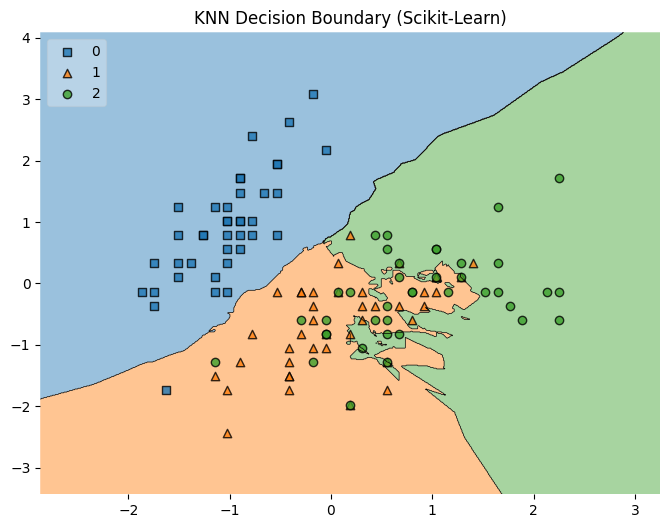

In [46]:
# KNN Decision Boundary Visualization using Scikit-Learn Model
X_vis = X_train[:, :2]
y_vis = y_train
knn_vis = KNeighborsClassifier(n_neighbors=optimal_k)
knn_vis.fit(X_vis, y_vis)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_vis, y_vis, clf=knn_vis, legend=2)
plt.title("KNN Decision Boundary (Scikit-Learn)")
plt.show()